In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


/Users/gigi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#CSV Reading and Data frame creation
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# EDA (Exploratory Data Analysis)

In [3]:
#Print the Dataframe shape
print("The shape of the train dataset is: ", df_train.shape)

The shape of the train dataset is:  (8693, 14)


In [4]:
#Explore the columns in the DataFrame
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
#Visualize the missing values "null values" in the DataFrame Train
df_train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [6]:
#Visualize the missing values "null values" in the DataFrame Test
df_test.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [7]:
#Explore the numerical and categorical variables in the Dataset to gain a better understanding of data treatment possibilities
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_train.select_dtypes(include=['object','bool']).columns

print('Numerical Columns', numerical_columns)
print('Categorical Columns', categorical_columns)

Numerical Columns Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Categorical Columns Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported'],
      dtype='object')


In [8]:
#Count of transported poeple in the trained DataFrame
df_train['Transported'].value_counts(normalize = True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

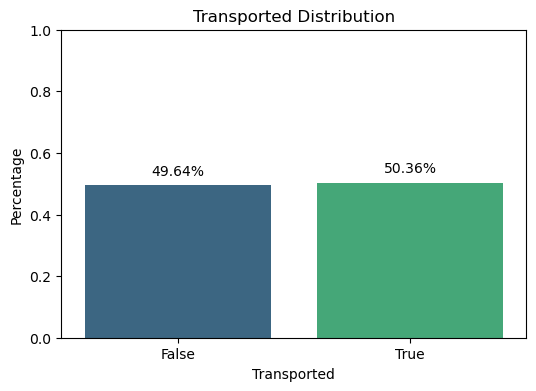

In [74]:
#Analysis: Compute the value counts of the 'Transported' column in the train dataset, 
# normalized to show percentages, and store the result in df_counts DataFrame
df_counts = df_train['Transported'].value_counts(normalize=True).reset_index(name='percentage')

#Plot the bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Transported", y='percentage', data=df_counts, palette='viridis')
plt.ylim(0, 1)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Transported Distribution')
plt.xlabel('Transported')
plt.ylabel('Percentage')
plt.show()

In [18]:
# Compute the value counts of the 'VIP' column in the train dataset, 
# normalized to show percentages
df_train['VIP'].value_counts(normalize=True)

VIP
False    0.976561
True     0.023439
Name: proportion, dtype: float64

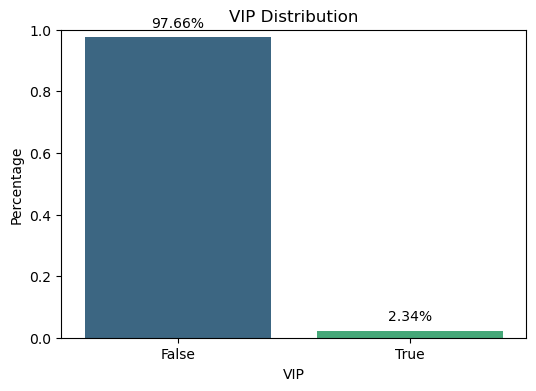

In [73]:
# Compute the value counts of the 'VIP' column in the train dataset, 
# normalized to show percentages, and reset the index with a new column name 'percentage'
df_counts = df_train['VIP'].value_counts(normalize=True).reset_index(name='percentage')

#Plot the bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='VIP', y='percentage', data=df_counts, palette='viridis')
plt.ylim(0, 1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('VIP Distribution')
plt.xlabel('VIP')
plt.ylabel('Percentage')
plt.show()

In [21]:
# Compute the value counts of the 'CryoSleep' column in the train dataset, 
# normalized to show percentages
df_train['CryoSleep'].value_counts(normalize=True)

CryoSleep
False    0.641694
True     0.358306
Name: proportion, dtype: float64

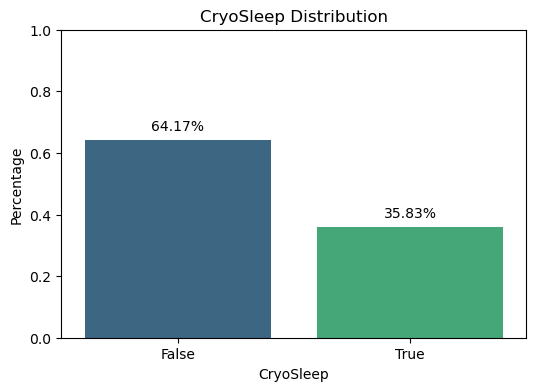

In [72]:
# Compute the value counts of the 'CryoSleep' column in the train dataset, 
# normalized to show percentages, and reset the index with a new column name 'percentage'
df_counts = df_train['CryoSleep'].value_counts(normalize=True).reset_index(name='percentage')

#Plot the bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='CryoSleep', y='percentage', data=df_counts, palette='viridis')
plt.ylim(0, 1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('CryoSleep Distribution')
plt.xlabel('CryoSleep')
plt.ylabel('Percentage')
plt.show()

In [23]:
# Compute the value counts of the 'HomePlanet' column in the train dataset, 
# normalized to show percentages
df_train['HomePlanet'].value_counts(normalize=True)

HomePlanet
Earth     0.541922
Europa    0.250942
Mars      0.207136
Name: proportion, dtype: float64

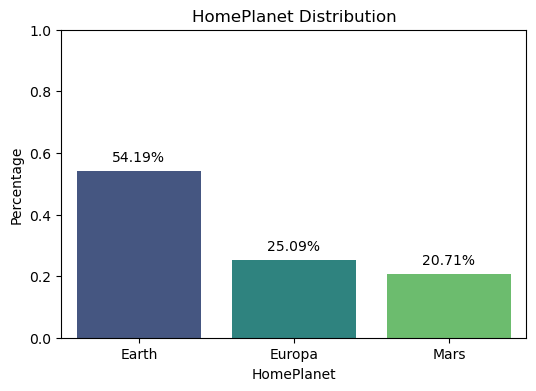

In [71]:
# Compute the value counts of the 'HomePlanet' column in the train dataset, 
# normalized to show percentages, and reset the index with a new column name 'percentage'
df_counts = df_train['HomePlanet'].value_counts(normalize=True).reset_index(name='percentage')

#Plot the bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='HomePlanet', y='percentage', data=df_counts, palette='viridis')
plt.ylim(0, 1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('HomePlanet Distribution')
plt.xlabel('HomePlanet')
plt.ylabel('Percentage')
plt.show()

In [25]:
# Compute the value counts of the 'Destination' column in the train dataset, 
# normalized to show percentages
df_train['Destination'].value_counts(normalize=True)

Destination
TRAPPIST-1e      0.694983
55 Cancri e      0.211491
PSO J318.5-22    0.093526
Name: proportion, dtype: float64

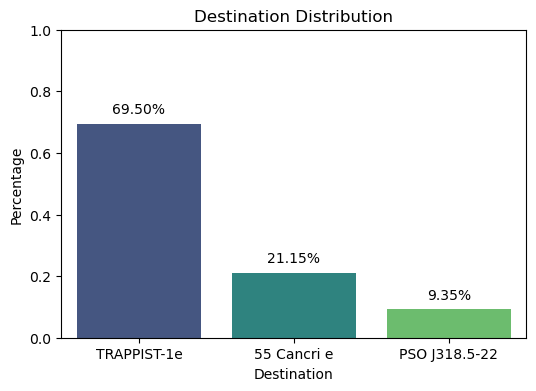

In [70]:
# Compute the value counts of the 'Destination' column in the train dataset, 
# normalized to show percentages, and reset the index with a new column name 'percentage'
df_counts = df_train['Destination'].value_counts(normalize=True).reset_index(name='percentage')

#Plot the bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Destination', y='percentage', data=df_counts, palette='viridis')
plt.ylim(0, 1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Destination Distribution')
plt.xlabel('Destination')
plt.ylabel('Percentage')
plt.show()

In [28]:
# Split the 'Cabin' column values into three separate columns: 'CabinDeck', 'CabinNo.', and 'CabinSide'
# Assign the resulting DataFrame to new columns in df_train
df_train[["CabinDeck", "CabinNo.", "CabinSide"]] = df_train["Cabin"].str.split('/', expand = True)

In [30]:
# Compute value counts of 'CabinDeck', 'CabinNo.', and 'CabinSide' columns, 
# then reset index and assign to separate DataFrames: df_counts_deck, df_counts_no, df_counts_side
df_counts_deck = df_train["CabinDeck"].value_counts().reset_index(name='Count_Deck')
df_counts_no = df_train["CabinNo."].value_counts().reset_index(name='Count_No')
df_counts_side = df_train["CabinSide"].value_counts().reset_index(name='Count_Side')

# Print the value counts for each category in 'CabinDeck', 'CabinNo.', and 'CabinSide' columns
print("CabinDeck Counts:\n", df_counts_deck)
print("\nCabinNo. Counts:\n", df_counts_no)
print("\nCabinSide Counts:\n", df_counts_side)

CabinDeck Counts:
   CabinDeck  Count_Deck
0         F        2794
1         G        2559
2         E         876
3         B         779
4         C         747
5         D         478
6         A         256
7         T           5

CabinNo. Counts:
      CabinNo.  Count_No
0          82        28
1          86        22
2          19        22
3          56        21
4         176        21
...       ...       ...
1812     1644         1
1813     1515         1
1814     1639         1
1815     1277         1
1816     1894         1

[1817 rows x 2 columns]

CabinSide Counts:
   CabinSide  Count_Side
0         S        4288
1         P        4206


In [31]:
# Calculate the normalized value counts of the 'CabinDeck' column in the train dataset
# Normalization provides percentages instead of raw counts
df_train['CabinDeck'].value_counts(normalize=True)

CabinDeck
F    0.328938
G    0.301271
E    0.103132
B    0.091712
C    0.087944
D    0.056275
A    0.030139
T    0.000589
Name: proportion, dtype: float64

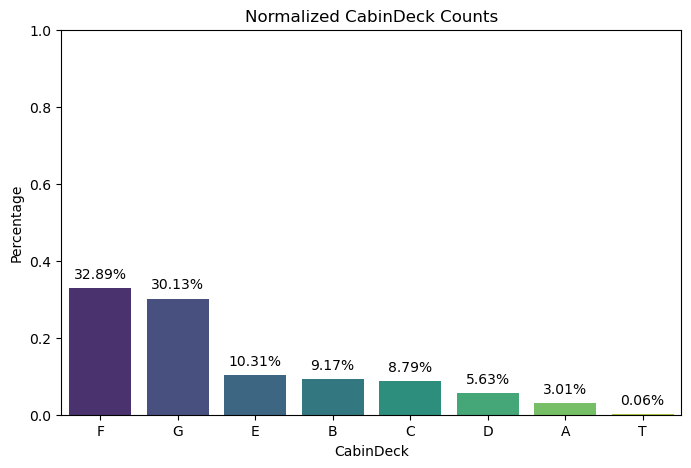

In [69]:
# Calculate the normalized value counts of the 'CabinDeck' column in the train dataset 
# and reset the index with a new column name 'percentage'
cabin_deck_counts = df_train['CabinDeck'].value_counts(normalize=True).reset_index(name='percentage')

#Plot the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='CabinDeck', y='percentage', data=cabin_deck_counts, palette='viridis')
plt.ylim(0, 1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Normalized CabinDeck Counts')
plt.xlabel('CabinDeck')
plt.ylabel('Percentage')
plt.show()

In [37]:
# Calculate the normalized value counts of the 'CabinSide' column in the train dataset
# Normalization provides percentages instead of raw counts
df_train['CabinSide'].value_counts(normalize=True)

CabinSide
S    0.504827
P    0.495173
Name: proportion, dtype: float64

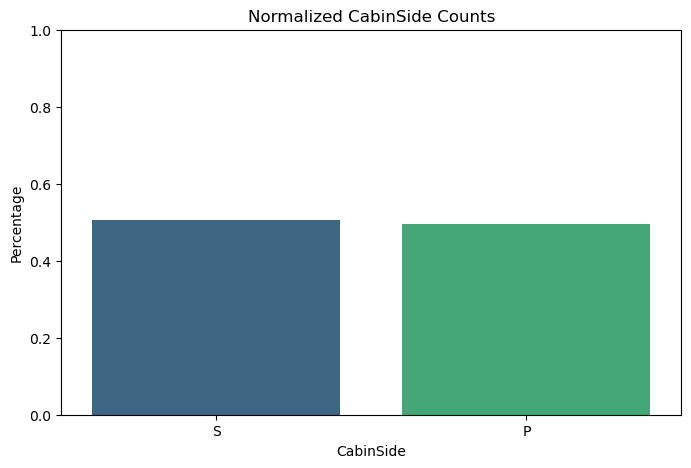

In [75]:
# Calculate the normalized value counts of the 'CabinSide' column in the train dataset 
# and reset the index with a new column name 'percentage'
cabin_side_counts = df_train['CabinSide'].value_counts(normalize=True).reset_index(name='percentage')

#Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='CabinSide', y='percentage', data=cabin_side_counts, palette='viridis')

plt.ylim(0, 1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Normalized CabinSide Counts')
plt.xlabel('CabinSide')
plt.ylabel('Percentage')
plt.show()

# Bivarable analysis

In [40]:
# Group the data in the DataFrame df_train by the 'HomePlanet' column,
# then aggregate the 'Transported' and 'PassengerId' columns by summing them up
# Reset the index and store the result in homeplanet_transported DataFrame
homeplanet_transported = df_train.groupby('HomePlanet').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'count'
                                                          }).reset_index()

# Calculate the percentage of transported passengers for each home planet
homeplanet_transported['TransportedPercentage'] = homeplanet_transported['Transported'] / homeplanet_transported['PassengerId']


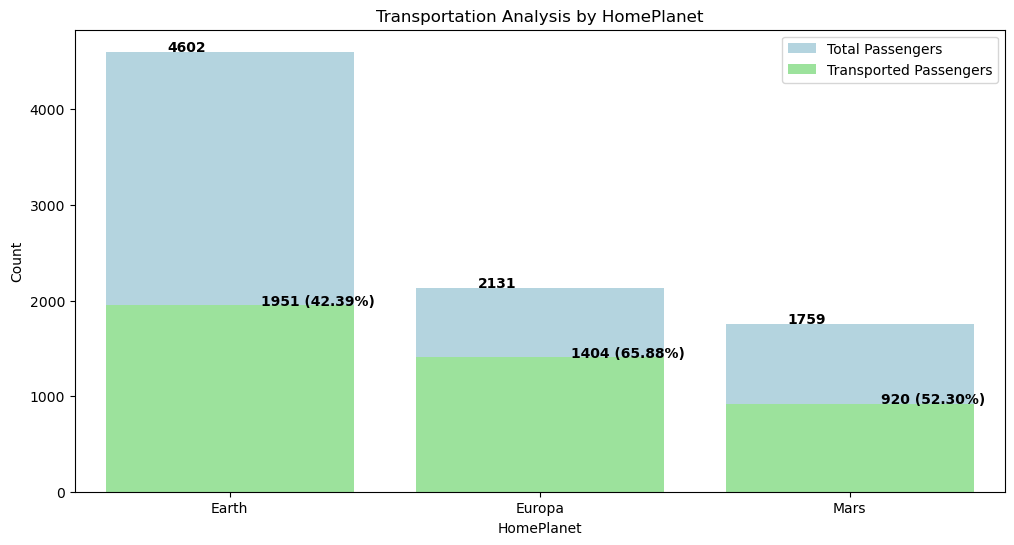

In [41]:
#Plot the bar chart 

plt.figure(figsize=(12, 6))

homeplanet_transported['TransportedPercentage'] = (homeplanet_transported['Transported'] / homeplanet_transported['PassengerId']) * 100

sns.barplot(x='HomePlanet', y='PassengerId', data=homeplanet_transported, color='lightblue', label='Total Passengers')
sns.barplot(x='HomePlanet', y='Transported', data=homeplanet_transported, color='lightgreen', label='Transported Passengers')

for i, (total, transported, percentage) in enumerate(zip(homeplanet_transported['PassengerId'], homeplanet_transported['Transported'], homeplanet_transported['TransportedPercentage'])):
    plt.text(i - 0.2, total + 2, f'{total}', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.1, transported + 2, f'{transported} ({percentage:.2f}%)', color='black', fontsize=10, fontweight='bold')

plt.title('Transportation Analysis by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.legend()
plt.show()

In [42]:
# Group the data in the DataFrame df_train by the 'CryoSleep' column,
# then aggregate the 'Transported' and 'PassengerId' columns by summing them up
# Reset the index and store the result in cryo_transported DataFrame
cryo_transported = df_train.groupby('CryoSleep').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'count'
                                                          }).reset_index()

# Calculate the percentage of transported passengers for each cryo sleep status
cryo_transported['TransportedPercentage'] = cryo_transported['Transported'] / cryo_transported['PassengerId']

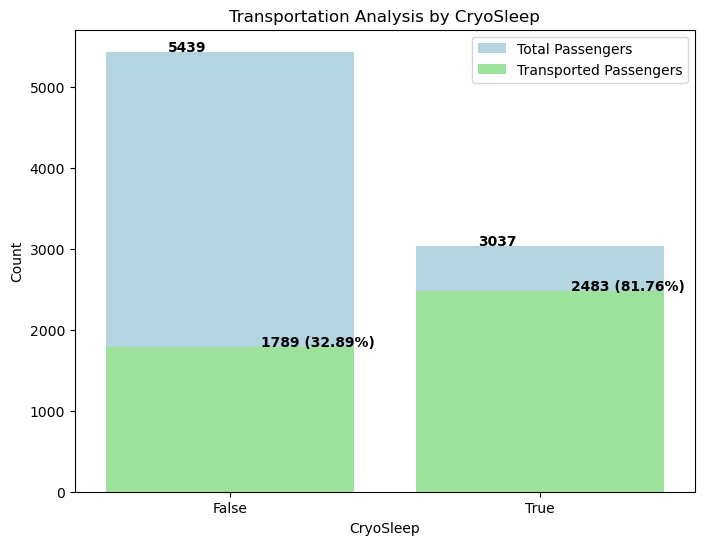

In [43]:
#Plot the bar chart
plt.figure(figsize=(8, 6))

cryo_transported['TransportedPercentage'] = (cryo_transported['Transported'] / cryo_transported['PassengerId']) * 100

sns.barplot(x='CryoSleep', y='PassengerId', data=cryo_transported, color='lightblue', label='Total Passengers')
sns.barplot(x='CryoSleep', y='Transported', data=cryo_transported, color='lightgreen', label='Transported Passengers')

for i, (total, transported, percentage) in enumerate(zip(cryo_transported['PassengerId'], cryo_transported['Transported'], cryo_transported['TransportedPercentage'])):
    plt.text(i - 0.2, total + 2, f'{total}', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.1, transported + 2, f'{transported} ({percentage:.2f}%)', color='black', fontsize=10, fontweight='bold')

plt.title('Transportation Analysis by CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.legend()
plt.show()

In [44]:
# Group the data in the DataFrame df_train by the 'Destination' column,
# then aggregate the 'Transported' and 'PassengerId' columns by summing them up
# Reset the index and store the result in destination_transported DataFrame
destination_transported = df_train.groupby('Destination').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'count'
                                                          }).reset_index()

# Calculate the percentage of transported passengers for each destination
destination_transported['TransportedPercentage'] = destination_transported['Transported'] / destination_transported['PassengerId']

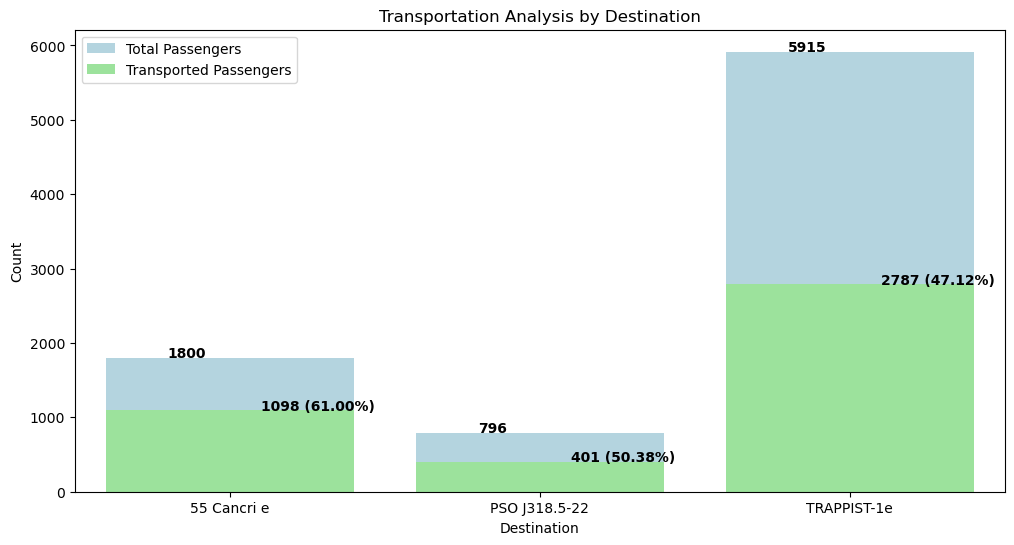

In [45]:
#Plot the bar chart
plt.figure(figsize=(12, 6))

destination_transported['TransportedPercentage'] = (destination_transported['Transported'] / destination_transported['PassengerId']) * 100

sns.barplot(x='Destination', y='PassengerId', data=destination_transported, color='lightblue', label='Total Passengers')
sns.barplot(x='Destination', y='Transported', data=destination_transported, color='lightgreen', label='Transported Passengers')

for i, (total, transported, percentage) in enumerate(zip(destination_transported['PassengerId'], destination_transported['Transported'], destination_transported['TransportedPercentage'])):
    plt.text(i - 0.2, total + 2, f'{total}', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.1, transported + 2, f'{transported} ({percentage:.2f}%)', color='black', fontsize=10, fontweight='bold')

plt.title('Transportation Analysis by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.legend()
plt.show()

In [46]:
# Group the data in the DataFrame df_train by the 'VIP' column,
# then aggregate the 'Transported' and 'PassengerId' columns by summing them up
# Reset the index and store the result in vip_transported DataFrame
vip_transported = df_train.groupby('VIP').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'count'
                                                          }).reset_index()

# Calculate the percentage of transported passengers for each VIP status
vip_transported['TransportedPercentage'] = vip_transported['Transported'] / vip_transported['PassengerId']

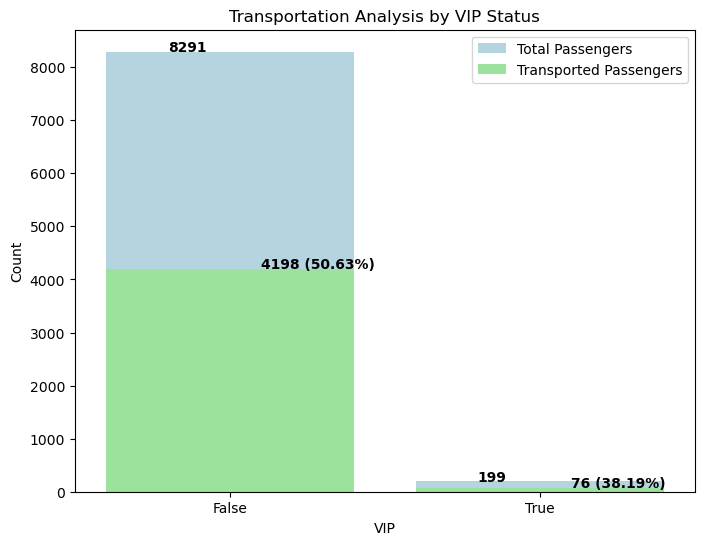

In [47]:
#Plot the bar chart
plt.figure(figsize=(8, 6))

vip_transported['TransportedPercentage'] = (vip_transported['Transported'] / vip_transported['PassengerId']) * 100

sns.barplot(x='VIP', y='PassengerId', data=vip_transported, color='lightblue', label='Total Passengers')
sns.barplot(x='VIP', y='Transported', data=vip_transported, color='lightgreen', label='Transported Passengers')

for i, (total, transported, percentage) in enumerate(zip(vip_transported['PassengerId'], vip_transported['Transported'], vip_transported['TransportedPercentage'])):
    plt.text(i - 0.2, total + 2, f'{total}', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.1, transported + 2, f'{transported} ({percentage:.2f}%)', color='black', fontsize=10, fontweight='bold')

plt.title('Transportation Analysis by VIP Status')
plt.xlabel('VIP')
plt.ylabel('Count')
plt.legend()
plt.show()

In [48]:
# Sort the cryo_transported DataFrame by the 'TransportedPercentage' column in descending order
cryo_transported.sort_values(by='TransportedPercentage', ascending=False)

,CryoSleep,Transported,PassengerId,TransportedPercentage
1,True,2483,3037,81.758314
0,False,1789,5439,32.892076


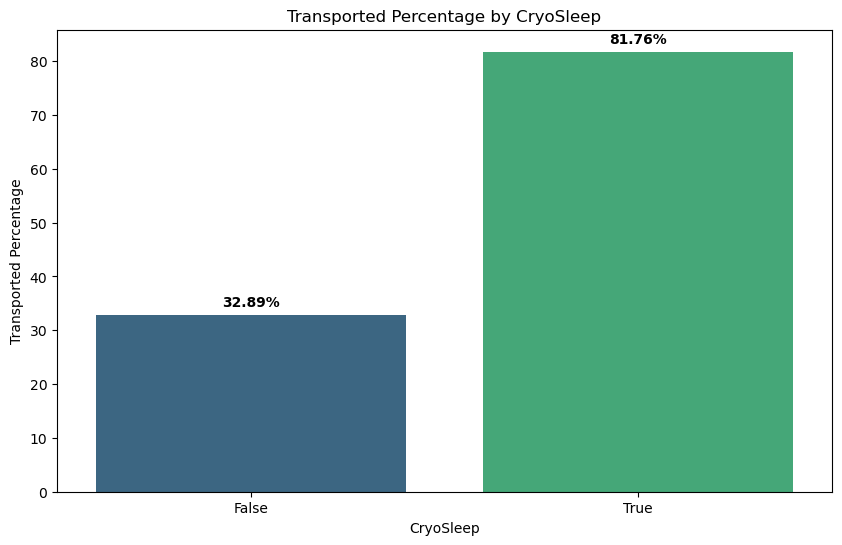

In [76]:
# Sort the cryo_transported DataFrame by the 'TransportedPercentage' column in ascending order
cryo_transported_sorted = cryo_transported.sort_values(by='TransportedPercentage', ascending=True)

#Plot the bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='CryoSleep', y='TransportedPercentage', data=cryo_transported_sorted, palette='viridis')

for i, percentage in enumerate(cryo_transported_sorted['TransportedPercentage']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Transported Percentage by CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Transported Percentage')
plt.show()


In [52]:
# Sort the DataFrame vip_transported by the 'TransportedPercentage' column in descending order
vip_transported.sort_values(by='TransportedPercentage', ascending=False)

,VIP,Transported,PassengerId,TransportedPercentage
0,False,4198,8291,50.633217
1,True,76,199,38.190955


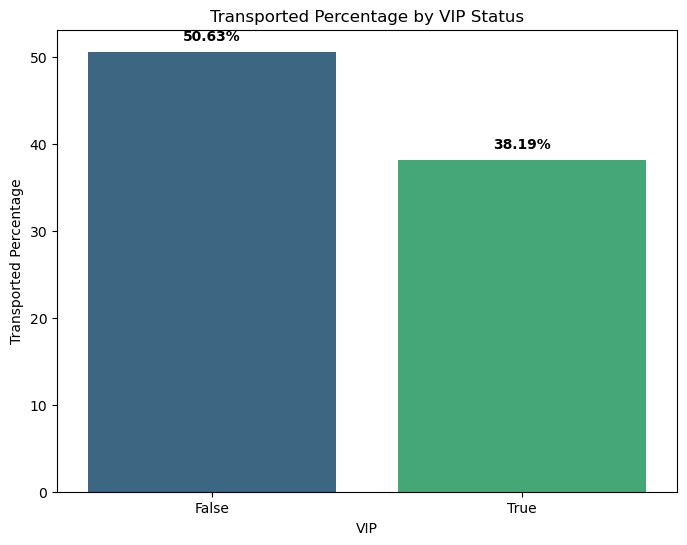

In [77]:
# Sort the DataFrame vip_transported by the 'TransportedPercentage' column in descending order
vip_transported_sorted = vip_transported.sort_values(by='TransportedPercentage', ascending=False)

#Plot the bar chart
plt.figure(figsize=(8, 6))

bar_plot = sns.barplot(x='VIP', y='TransportedPercentage', data=vip_transported_sorted, palette='viridis')

for i, percentage in enumerate(vip_transported_sorted['TransportedPercentage']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Transported Percentage by VIP Status')
plt.xlabel('VIP')
plt.ylabel('Transported Percentage')
plt.show()


In [54]:
# Sort the DataFrame homeplanet_transported by the 'TransportedPercentage' column in descending order
homeplanet_transported.sort_values(by='TransportedPercentage', ascending=False)

,HomePlanet,Transported,PassengerId,TransportedPercentage
1,Europa,1404,2131,65.884561
2,Mars,920,1759,52.302445
0,Earth,1951,4602,42.394611


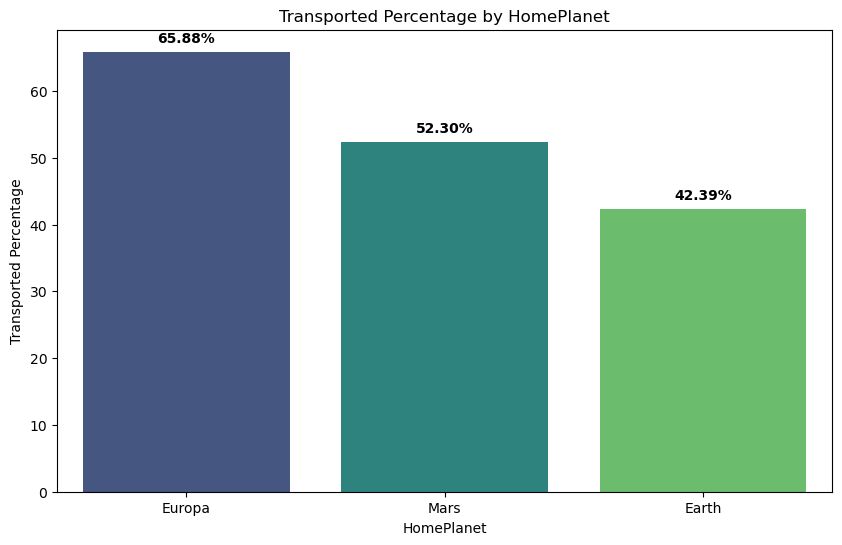

In [78]:
# Sort the DataFrame homeplanet_transported by the 'TransportedPercentage' column in descending order
homeplanet_transported_sorted = homeplanet_transported.sort_values(by='TransportedPercentage', ascending=False)

#Plot the bar chart
plt.figure(figsize=(10, 6))

bar_plot = sns.barplot(x='HomePlanet', y='TransportedPercentage', data=homeplanet_transported_sorted, palette='viridis')

for i, percentage in enumerate(homeplanet_transported_sorted['TransportedPercentage']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Transported Percentage by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Transported Percentage')
plt.show()


In [56]:
# Sort the DataFrame destination_transported by the 'TransportedPercentage' column in descending order
destination_transported.sort_values(by='TransportedPercentage', ascending=False)

,Destination,Transported,PassengerId,TransportedPercentage
0,55 Cancri e,1098,1800,61.000000
1,PSO J318.5-22,401,796,50.376884
2,TRAPPIST-1e,2787,5915,47.117498


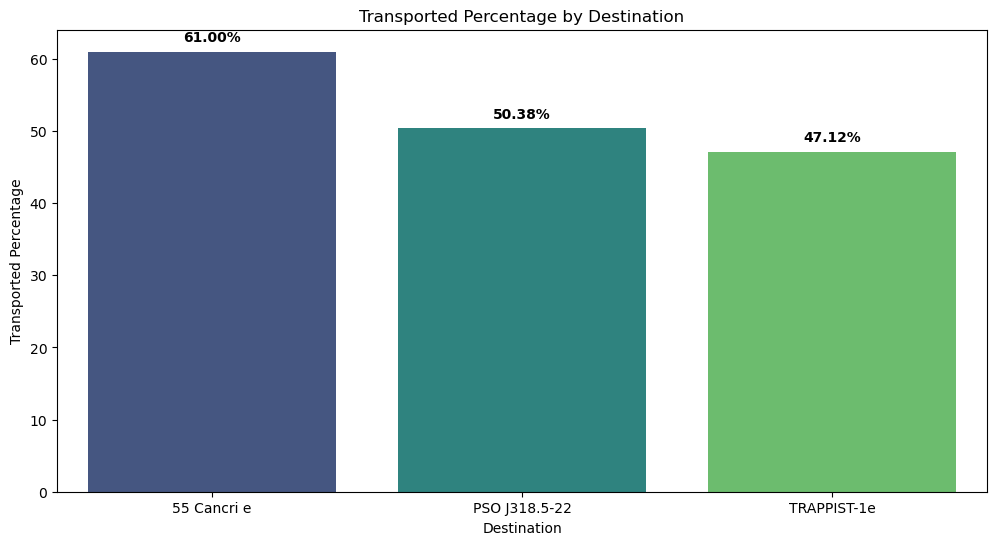

In [79]:
# Sort the DataFrame destination_transported by the 'TransportedPercentage' column in descending order
destination_transported_sorted = destination_transported.sort_values(by='TransportedPercentage', ascending=False)

#Plot the bar chart
plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x='Destination', y='TransportedPercentage', data=destination_transported_sorted, palette='viridis')

for i, percentage in enumerate(destination_transported_sorted['TransportedPercentage']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Transported Percentage by Destination')
plt.xlabel('Destination')
plt.ylabel('Transported Percentage')
plt.show()

## Null Values

In [58]:
# Merge train and test to infer null values

df_train2= df_train.drop(["CabinDeck", "CabinNo.", "CabinSide"], axis=1).copy().drop(['Transported'],axis=1)
df_train2.shape

(8693, 13)

In [60]:
# Concatenate dataframes df_train2 and df_test along axis 0 (row-wise)
# Reset the index of the concatenated dataframe and drop the old index

data = pd.concat([df_train2, df_test], axis = 0).reset_index(drop = True)

# Save the concatenated dataframe to a CSV file
data.to_csv('./merged_data.csv')
data.shape

(12970, 13)

In [61]:
# Count the number of missing values in each column and sort them in descending order
nans = data.isnull().sum().sort_values(ascending=False)

# Count the number of non-missing values in each column and sort them in descending order
not_nans = data.notnull().sum().sort_values(ascending=False)

In [62]:
# Create a DataFrame from the 'nans' Series
nans = pd.DataFrame(nans)

# Calculate the percentage of missing values for each column
nans['Percentage'] = nans[0]/12970*100

nans

,0,Percentage
CryoSleep,310,2.390131
ShoppingMall,306,2.359291
Cabin,299,2.305320
VIP,296,2.282190
Name,294,2.266769
FoodCourt,289,2.228219
HomePlanet,288,2.220509
Spa,284,2.189668
Destination,274,2.112567
Age,270,2.081727


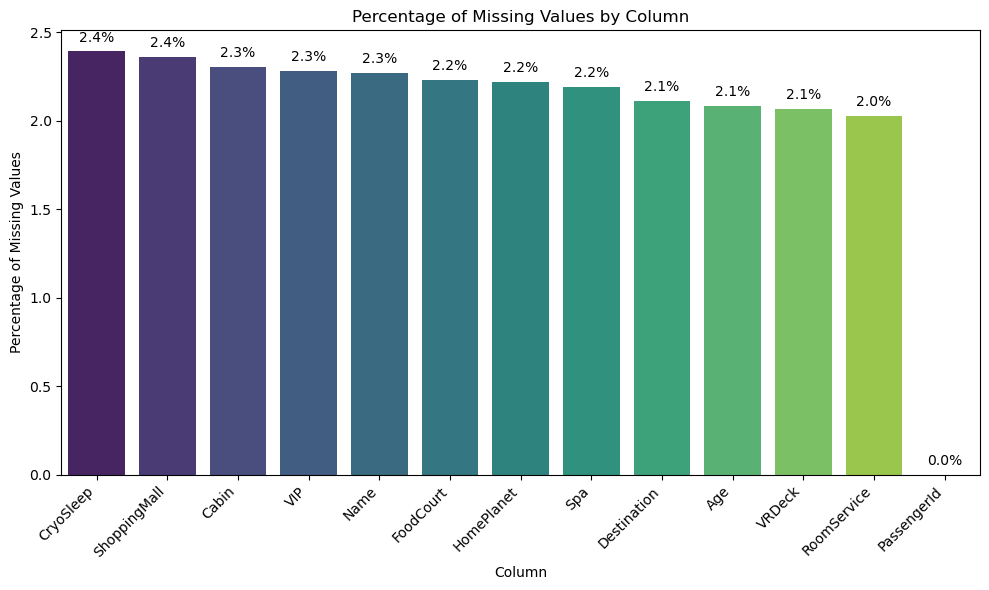

In [68]:
#Plot the bar chart

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=nans.index, y='Percentage', data=nans, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Percentage of Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Percentage of Missing Values')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [80]:
# Count the number of rows with at least one null value
null_rows = len(data[data.isnull().any(axis=1)])

# Calculate the percentage of rows with null values in the entire dataset
percentage_null = null_rows/len(data)*100


print(f'There are {null_rows} rows with null values, about {round(percentage_null,2)}% of the data has some null value' )

There are 3083 rows with null values, about 23.77% of the data has some null value
